#<b>Milestone 1

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

###<b> Mounting the Drive

In [3]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b>Loading libraries</b>

In [4]:
#Importing libraries required to load the data

import zipfile
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU, GlobalAvgPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [5]:
#Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/CNN Malaria Detection/cell_images.zip'

#The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

The files have been extracted to the local session of Google Colab. The extracted folder would have the following structure:

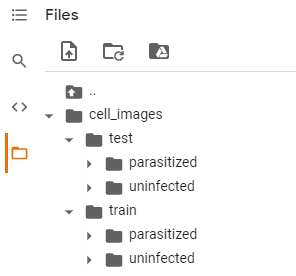

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [6]:
#Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

#Size of image so that each image has the same size
SIZE = 64

#Empty list to store the training images after they are converted to NumPy arrays
train_images = []

#Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [7]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            #Resizing each image to (224,224)
            image = image.resize((SIZE, SIZE))

            #Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [8]:
#Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

#Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

#Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

#Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [9]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            #Resizing each image to (128,128)
            image = image.resize((SIZE, SIZE))
            
            #Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [10]:
# shape of images
print('test image shape:', test_images.shape)
print('train image shape:', train_images.shape)

test image shape: (2600, 64, 64, 3)
train image shape: (24958, 64, 64, 3)


###<b> Checking the shape of train and test labels

In [70]:
# shape of labels 

print('train label shape:', train_labels.shape, train_labels)
print('test label shape:', test_labels.shape, test_labels)


train label shape: (24958,) [1 1 1 ... 0 0 0]
test label shape: (2600,) [1 1 1 ... 0 0 0]


#####Observations and insights: 

- there are 24958 training and 2600 test picurtes
- all pictures appear to be labled
- each pictue is 64x64 pixles and colored (3 layers)


### <b>Check the minimum and maximum range of pixel values for train and test images

In [12]:
# try to use min and max function from numpy
print ('traing range:', train_images.min(), '-', train_images.max())
print ('test range:', test_images.min(), '-', test_images.max())

traing range: 0 - 255
test range: 0 - 255


#####** Observations and insights: **
- Images have bwtween 0 and 255 (dark and light) 
- Images will need to be normalized between 0 and 1
- The lables are a bianary list
- THe test and train data is organized so that all the parasitized images are first followed by the uninfected



###<b> Count the number of values in both uninfected and parasitized 

In [13]:
# try to use value_counts to count the values
train_infected = (train_labels == 1).sum()
train_unifected = (train_labels == 0).sum()
print('Training infected:', train_infected, 'Training Uninfected:', train_unifected)

test_infected = (test_labels == 1).sum()
test_unifected = (test_labels == 0).sum()
print('Test infected:', test_infected, 'Test Uninfected:', test_unifected)

Training infected: 12479 Training Uninfected: 12479
Test infected: 1300 Test Uninfected: 1300


###<b>Normalize the images

In [14]:
# try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')
test_images = (test_images/225).astype('float32')

##### **Observations and insights:**

- Both test and training data is split half parasitized and half uninfected so the data should not be skewed when training. 

###<b> Plot to check if the data is balanced

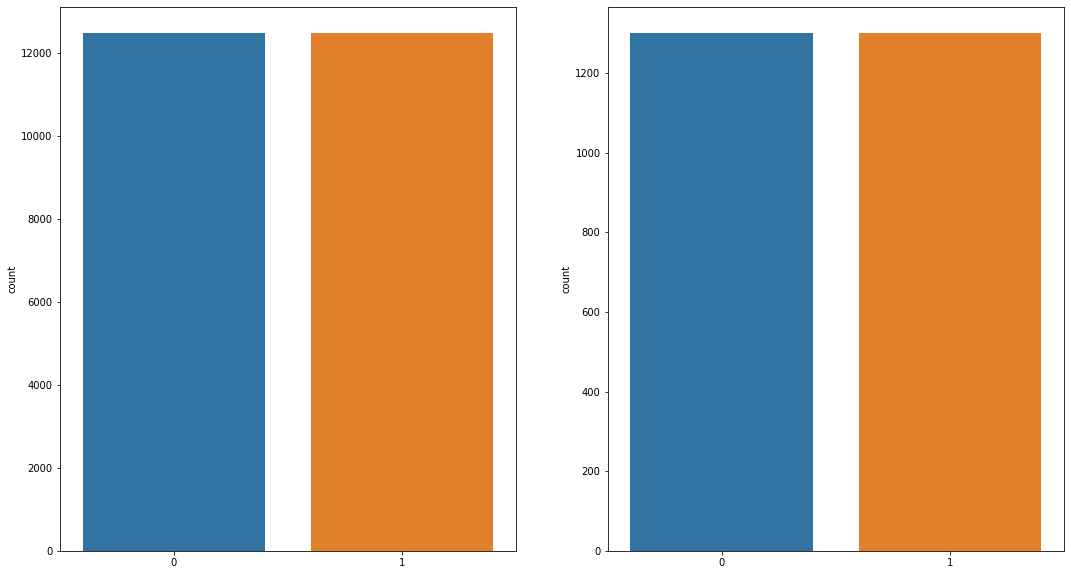

In [15]:
# you are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced

fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.countplot(ax = axes[0],x = train_labels)
sns.countplot(ax = axes[1], x = test_labels)




##### **Observations and insights:**

- as we can see from the count polts, the data sets are evenly split between infected and uninfected samples in both the train and test sets. 

### <b>Data Exploration</b>
Let's visualize the images from the train data

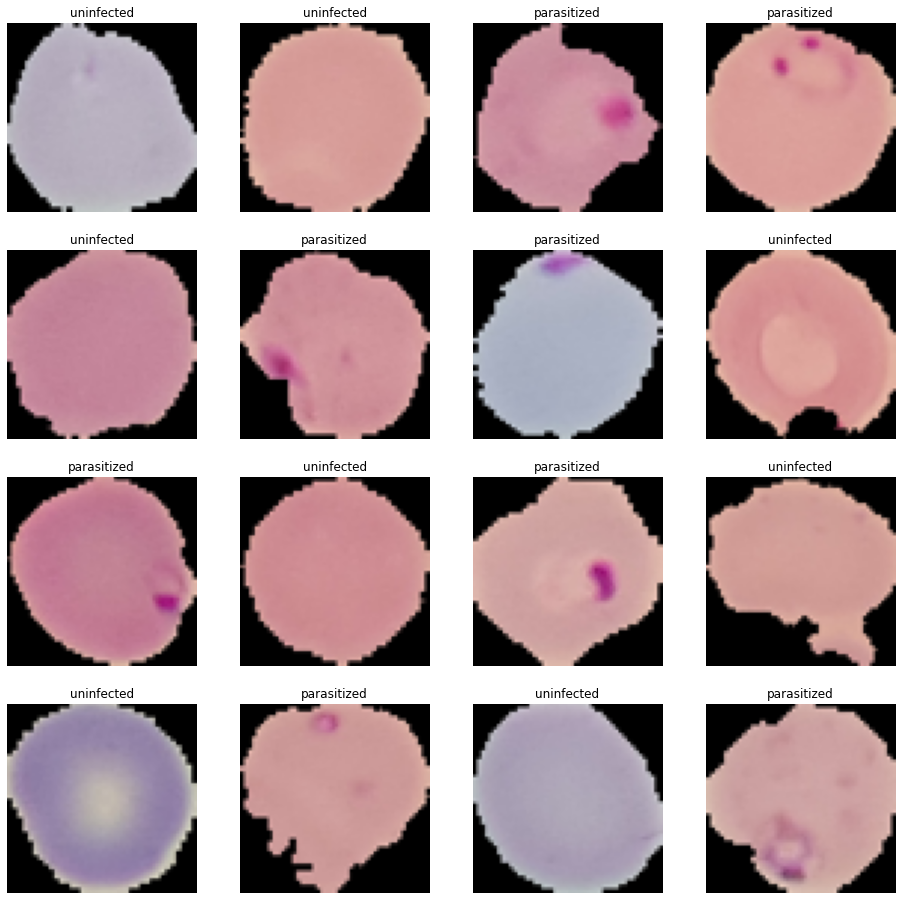

In [16]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)
plt.figure(1 , figsize = (16 , 16))

for n in range(1, 17):
    plt.subplot(4, 4, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(train_images[index])
    plt.axis('off')

#####<b> Observations and insights: 

Uninfected:
-  images appear round and intact
- they have a purple colour and no spots

Infected: 
- images can appear pink
- they have dark spots 
- they appear to be pointed or bumpy

###<b> Similarly visualize the images with subplot(6,6) and figsize=(12,12)

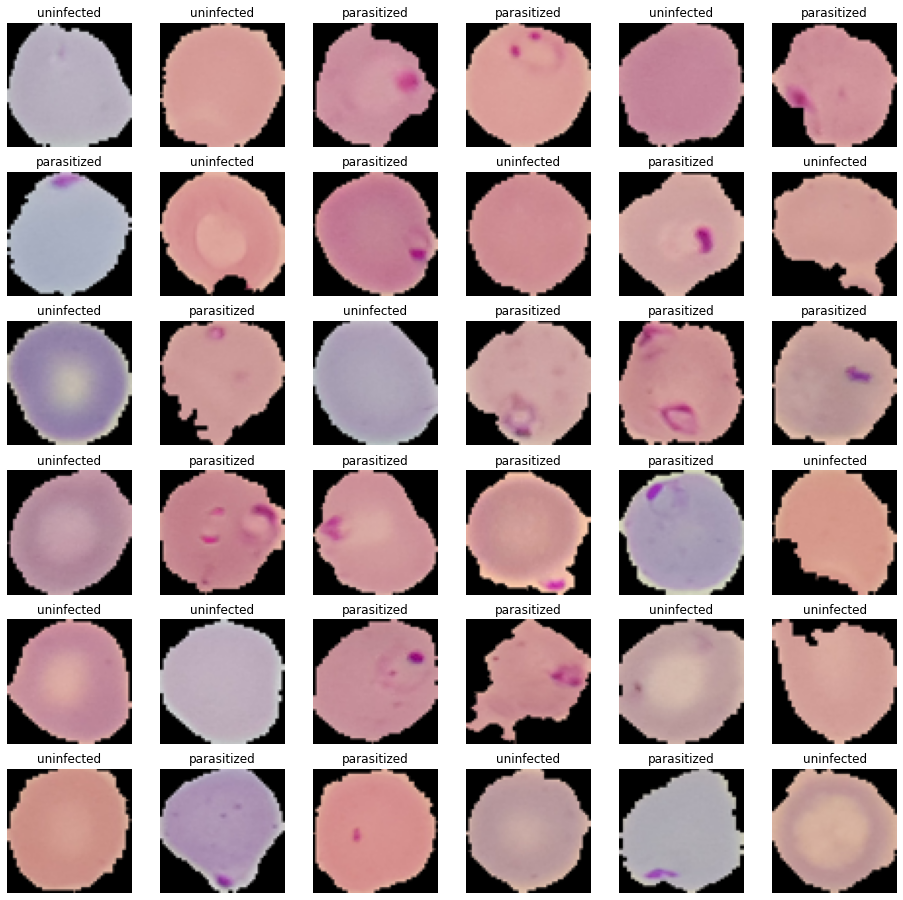

In [17]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate
np.random.seed(42)
plt.figure(1 , figsize = (16 , 16))

for n in range(1, 37):
    plt.subplot(6, 6, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(train_images[index])
    plt.axis('off')


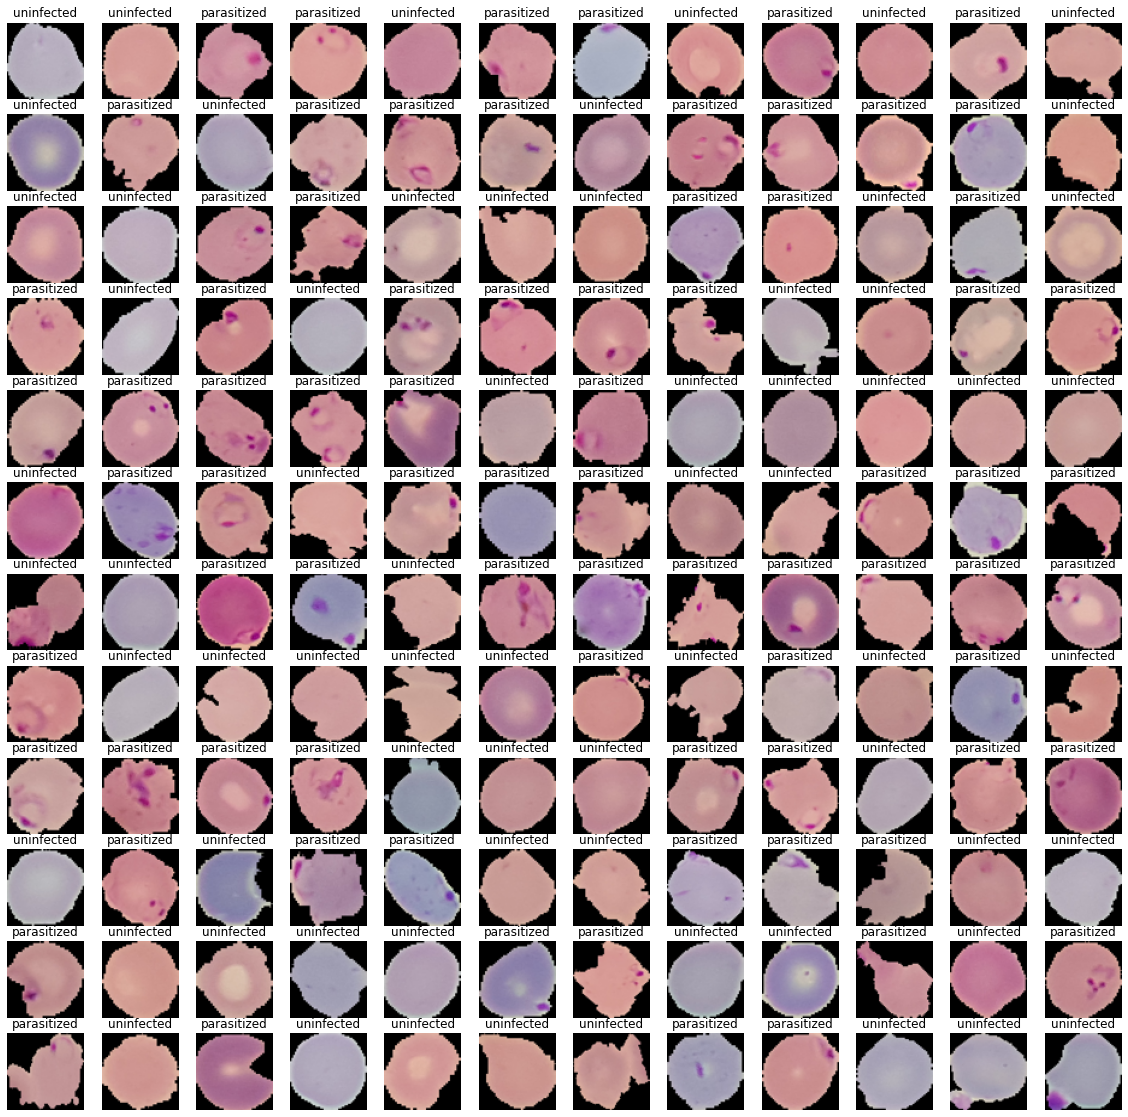

In [18]:
np.random.seed(42)
plt.figure(1 , figsize = (20 , 20))

for n in range(1, 145):
    plt.subplot(12, 12, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(train_images[index])
    plt.axis('off')

#####<b>Observations and insights:

###<b> Plotting the mean images for parasitized and uninfected

In [19]:
# function to find the mean
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]
    # reshape it back to a matrix
    plt.imshow(mean_img)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

<b> Mean image for parasitized

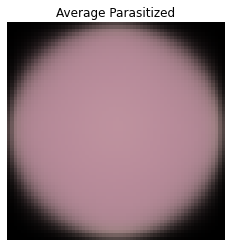

In [20]:
# If the label=1 then the image is parasitised and if the label=0 then the image is uninfected
parasitized_data=[]                                # Create a list to store the parasitized data
for img, label in zip(train_images, train_labels):
        if label==1:
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean


<b> Mean image for uninfected

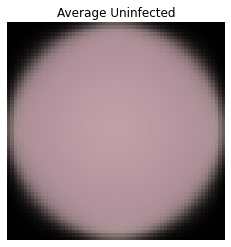

In [21]:
# Similarly write the code to find the mean image of uninfected

uninfected_data=[]                                
for img, label in zip(train_images, train_labels):
        if label==0:
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected') 


#####<b> Observations and insights: 

There is a slight difference in the overall color of paracitized vs uninfected cells, but otherwise the average of both shapes and the consistancy of color (no spots) are similar to my eye. 

### <b>Converting RGB to HSV of Images using OpenCV

####<b> Converting the train data

In [73]:
import cv2
gfx=[]   # to hold the HSV image array
for i in np.arange(0,24958,1):
  a=cv2.cvtColor(train_images[i],cv2.COLOR_BGR2HSV)
  gfx.append(a)
gfx=np.array(gfx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


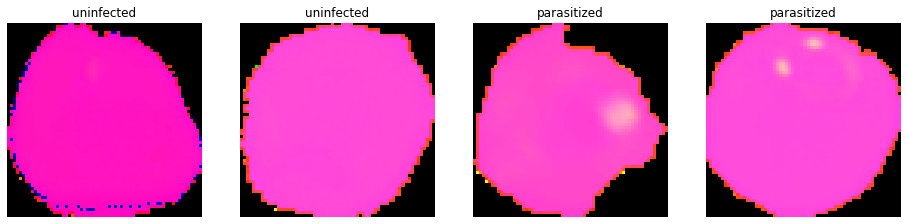

In [87]:
np.random.seed(42)
plt.figure(1 , figsize = (16 , 16))

for n in range(1, 5):
    plt.subplot(1, 4, n)
    index = int(np.random.randint(0, gfx.shape[0], 1))         # I wanted to see both parisitized and uninfected blood cells
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(gfx[index])
    plt.axis('off')

####<b> Converting the test data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


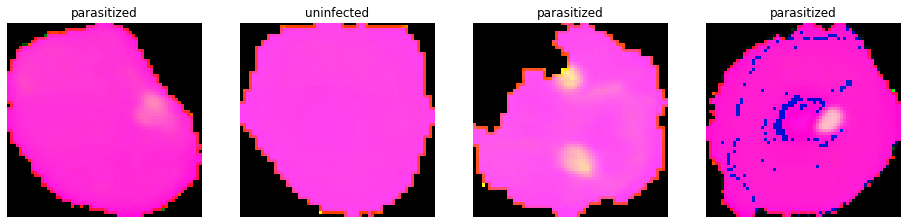

In [86]:
import cv2
gfx1=[]   # to hold the HSV image array
for i in np.arange(0,2000,1):
  a=cv2.cvtColor(test_images[i],cv2.COLOR_BGR2HSV)
  gfx1.append(a)
gfx1=np.array(gfx1)

np.random.seed(42)
plt.figure(1 , figsize = (16 , 16))

for n in range(1, 5):
    plt.subplot(1, 4, n)
    index = int(np.random.randint(0, gfx1.shape[0], 1))         # I wanted to see both parisitized and uninfected blood cells
    if test_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(gfx1[index])
    plt.axis('off')


#####**Observations and insights:**

- images represent both uninfected (0) and parsitized (1)
- cells become similar colors
- parasites in the cell show as yellow 
- some uninfected and parasitized images include blue pixles


###<b> Processing Images using Gaussian Blurring

####<b> Gaussian Blurring on train data

In [81]:
gbx=[]  ## to hold the blurred images
for i in np.arange(0,20000,1):
  b= cv2.GaussianBlur(train_images[i], (5, 5), 0)
  gbx.append(b)
gbx=np.array(gbx)

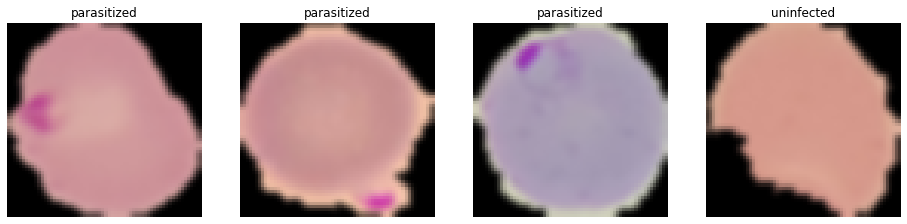

In [85]:
plt.figure(1 , figsize = (16 , 16))
for n in range(1, 5):
    plt.subplot(1, 4, n)
    index = int(np.random.randint(0, gbx.shape[0], 1))         # I wanted to see both parisitized and uninfected blood cells
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(gbx[index])
    plt.axis('off')

####<b> Gaussian Blurring on test data

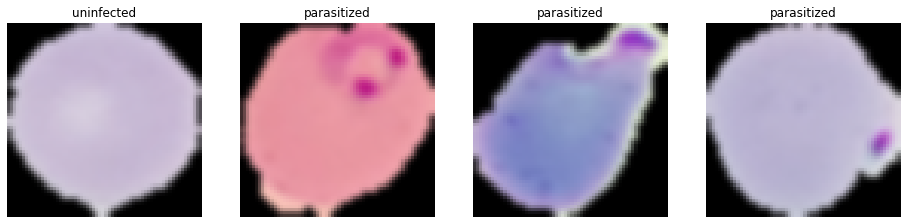

In [89]:
gbx1=[]  
for i in np.arange(0,2000,1):
  b= cv2.GaussianBlur(test_images[i], (5, 5), 0)
  gbx1.append(b)
gbx1=np.array(gbx1)

plt.figure(1 , figsize = (16 , 16))
for n in range(1, 5):
    plt.subplot(1, 4, n)
    index = int(np.random.randint(0, gbx1.shape[0], 1))         # I wanted to see both parisitized and uninfected blood cells
    if test_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(gbx1[index])
    plt.axis('off')

#####**Observations and insights:**

- bluring deos not appear to make infected cells more clear
- in some instances, the dark purple appears more spread, but in cells with little purple, the blurring obscures it
- I will not use bluring in the final code

Do you think that blurring would help us for this problem statement in any way?

## **Proposed approach**

**Potential techniques:** What different techniques should be explored?<br>
- I will converte from RGB to HSV - parsitized cells included small yellow patches that were not present in uninfected cells
- 

**Overall solution design:** What is the potential solution design?<br>
- The final code will produce images of the original cell with the label parasitized or uninfected. 

**Measures of success:** What are the key measures of success?<br>
- Since this is a medical use, we should aim for 99% accuracy on test data. 
- False negatives would cause the most damage and should be minimized. 